In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

# Activation Function


![test](https://www.i2tutorials.com/wp-content/uploads/2019/09/Deep-learning-25-i2tutorials.png)



In [2]:
def relu(z, deriv=False):
    activations = []
    shape = z.shape
    z = z.flatten()
    if deriv:  # Return Derivative of Function
        
        for i in range(len(z)):
            if z[i] >= 0:
                activations.append(1)
            else:
                activations.append(0.2)
        return np.array(activations).reshape(shape)
    
    for i in range(len(z)):
        if z[i] > 0:
            activations.append(z[i])
        else:
            activations.append(0.2 * z[i])
    return np.array(activations).reshape(shape)

# Weight & Bias Initialization

Bias Values ($b$) are initialized with $0$.  
Weight Values ($w$) are initialized with random values between $min$ and $max$.

In [3]:
def initialize(min=0, max=1, do_print=True):
    global w, b
    w = [
            max * np.random.uniform(min, max, (2, 3)),
            max * np.random.uniform(min, max, (3, 3)),
            max * np.random.uniform(min, max, (3, 2)),
            max * np.random.uniform(min, max, (2, 1))
        ]
    b = [
        np.array(np.zeros(3)),
        np.array(np.zeros(3)),
        np.array(np.zeros(2)),
        np.array(np.zeros(1))
    ]
    if do_print:
        for i in range(len(b)): print(f'Layer {i}:\nWeights:\n {w[i]} (Shape: {w[i].shape})\nBias: \n{b[i]} (Shape: {b[i].shape})\n')    

w, b = [], []

initialize()

Layer 0:
Weights:
 [[0.2691932  0.64935961 0.23511019]
 [0.65985629 0.86056022 0.22106011]] (Shape: (2, 3))
Bias: 
[0. 0. 0.] (Shape: (3,))

Layer 1:
Weights:
 [[0.50063083 0.16287178 0.32707676]
 [0.59549772 0.25531792 0.95342564]
 [0.55282029 0.38249531 0.66991016]] (Shape: (3, 3))
Bias: 
[0. 0. 0.] (Shape: (3,))

Layer 2:
Weights:
 [[0.20430429 0.81467913]
 [0.73185745 0.99687913]
 [0.95436248 0.34653977]] (Shape: (3, 2))
Bias: 
[0. 0.] (Shape: (2,))

Layer 3:
Weights:
 [[0.76688415]
 [0.30492832]] (Shape: (2, 1))
Bias: 
[0.] (Shape: (1,))



# Forward Propagation
List $a$ holds each layers activation vector.  
List $z$ holds each layers pre nonlinearity vector.

## Algorithm

For each layer $L$, starting with $L_0$ we multiply the $h$ vector with the weight matrix $w$.

$$
w = \left[ \begin{array}{rrr}
1.3 & 0.2 \\                                              
0.1 & 1.4 \\
1.2 & 0 \\
\end{array}\right] \ \ \ \ \ \ \ 
h = \left( \begin{array}{rrr}
1.3 \\                                              
0.1 \\
1.2 \\
\end{array}\right)
$$

In [4]:
a, z = [], []

initialize(do_print=False)

def forward_prop(X):
    h = X
    global a, z
    a,z  = [], []
    for i in range(len(w)):
        h = h @ w[i] # weigt * input
        h = h + b[i] # bias add
        z.append(h)
        h = relu(h) # Activation Function
        a.append(h)
    return h

forward_prop(np.array([0,1]))

array([2.03056778])

# Back Prop

for each layer

$g = loss'(X,y)$

## Step 1 ($a$ to $z$)

$g = relu'(z)$



## Step 2 ($z$ to $W$)

$g = relu'(z) * a_{L-1}$


## Step 1 Activation Function Deriv

$g = [1\times2]$


In [5]:
learning_rate = 0.05

initialize(do_print=False)

def back_prop(X, y, print_loss=False):
    global a, z, w, b

    g = (X - y).reshape(1,-1).T  # Loss Function Derivative
    loss = 0.5*(y - X)**2
    
    if print_loss:
        print("Loss: ", (y - X)**2)
    
    n_weights, n_bias = [], []
    
    for x in range(len(w)):
        i = len(b) - 1 - x  # Reverse Index

        # Activation Function Derivative 
        g = g * relu(z[i], True)  # Activation Function Derivative
        
        # Derivative with respect to weight
        if i-1 < 0: w_der = y.reshape(1,-1).T
        else: w_der = a[i-1].reshape(1,-1).T  # Previous Layer Activation
        
        # Change in Weights & Bias
        n_weights.append(w[i] - learning_rate * (w_der @ g))
        n_bias.append(b[i] - learning_rate * g)
        
        g = g @ w[i].T 
    
    # Updating Weights
    w = list(reversed(n_weights))
    b = list(reversed(n_bias))
    
    return loss
    

X = forward_prop(np.array([0,1]))
print(X)
back_prop(X, np.array([1]))

[1.39361445]


array([0.07746617])

In [6]:
from random import randint

def train(epochs, size=100):
    for i in range(epochs):
        tmp = 0.0
        for x in range(size):
            y1 = randint(0,1)
            y2 = randint(0,1)
            tmp += back_prop(forward_prop(np.array([y1,y2])), np.array([y1+y2]))[0]
        print("Loss: ", tmp/size)

initialize(do_print=False)
train(20, 100)
print(forward_prop(np.array([0.2,0.3])))
print(forward_prop(np.array([0.7,0.2])))
print(forward_prop(np.array([1,0])))
print(forward_prop(np.array([1,1])))

Loss:  [0.04529865]
Loss:  [0.00946141]
Loss:  [0.00501325]
Loss:  [0.00289472]
Loss:  [0.00173455]
Loss:  [0.00089255]
Loss:  [0.00047196]
Loss:  [0.00036827]
Loss:  [0.00021339]
Loss:  [0.00013773]
Loss:  [5.56637061e-05]
Loss:  [3.24555633e-05]
Loss:  [1.91940154e-05]
Loss:  [1.2280882e-05]
Loss:  [6.53740276e-06]
Loss:  [3.3244694e-06]
Loss:  [1.72690185e-06]
Loss:  [8.77244406e-07]
Loss:  [5.09636627e-07]
Loss:  [2.76851063e-07]
[[0.50005145]]
[[0.89961736]]
[[0.99925426]]
[[1.99998743]]


## Learning XOR

Loss:  [0.09234535]
Loss:  [0.09735891]
Loss:  [0.06414974]
Loss:  [0.00248964]
Loss:  [7.68567123e-19]
Loss:  [8.92411225e-32]
Loss:  [1.55449972e-32]
Loss:  [1.54402266e-32]
Loss:  [1.55489415e-32]
Loss:  [1.46908087e-32]
Loss:  [1.52341367e-32]
Loss:  [1.50356889e-32]
Loss:  [1.51855724e-32]
Loss:  [1.4830092e-32]
Loss:  [1.52366019e-32]
Loss:  [1.47669831e-32]
Loss:  [1.53453168e-32]
Loss:  [1.55775377e-32]
Loss:  [1.53275674e-32]
Loss:  [1.50275537e-32]
[[1.]]
[[1.]]
[[2.22044605e-16]]
[[1.11022302e-16]]


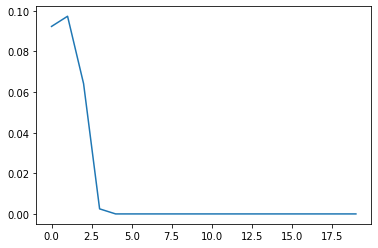

In [7]:
X = [
    [0,1],
    [0,0],
    [1,0],
    [1,1]
]

y = [1,0,1,0]

initialize(-1, 1, do_print=False)

def train(epochs, size=100):
    l = []
    for i in range(epochs):
        tmp = 0.0
        for x in range(size):
            y1 = randint(0,3)
            tmp += back_prop(forward_prop(np.array(X[y1])), np.array(y[y1]))[0]
        l.append(tmp/size)
        print("Loss: ", tmp/size)
    return np.array(l).flatten()

loss_over_time =  train(20,1000)

print(forward_prop(np.array([1,0])))
print(forward_prop(np.array([0,1])))
print(forward_prop(np.array([0,0])))
print(forward_prop(np.array([1,1])))

plt.plot(loss_over_time)

# Recursive Backpropagation Implementation
Exmaple: Learning XOR

In [8]:
np.set_printoptions(precision=3)


def backprop_entry(X, y, print_loss=False):
    global a, z, w, b, n_weights, n_bias
    n_weights, n_bias = [], []
    
    backprop_rec(0, X, y)
    
    # Update Weights
    w = list(reversed(n_weights))
    b = list(reversed(n_bias))
    return 0.5*(y - X)**2  # Return Loss


def backprop_rec(i, X, y):
    global a, z, w, b, n_weights, n_bias

    # Base Case
    if i+1 > len(w): return (X - y).reshape(1,-1).T
    
    g = backprop_rec(i+1, X, y) * relu(z[i], True)  # Get Next Layer Derivative
    
    # Derivative with respect to weight [1xn]  
    if i-1 < 0: w_der = y.reshape(1,-1).T  # Input Matrix
    else: w_der = a[i-1].reshape(1,-1).T  # Previous Layer Activation

    # Save change in weights
    n_weights.append(w[i] - learning_rate * (w_der @ g))
    n_bias.append(b[i] - learning_rate * g)
    
    return g @ w[i].T 

def train_rec(epochs, size=100, threshold=0.0001):
    l = []
    for i in range(epochs):
        sum_loss = 0.0
        for x in range(size):
            y1 = randint(0,3)
            
            sum_loss += backprop_entry(forward_prop(np.array(X[y1])), np.array(y[y1]))[0]
        l.append(sum_loss/size)
        print(f'[Epoch {i}] Loss: {l[-1]}')
        if l[-1] < threshold or l[-1] != l[-1]: break
    return np.array(l).flatten()

# Reinitialize Weights & Bias
initialize(-1, 1, do_print=False)

loss_over_time = train_rec(200,1000)


print(forward_prop(np.array([[1,0], 
                             [0,1], 
                             [1,1], 
                             [0,0]])))

[Epoch 0] Loss: [0.121]
[Epoch 1] Loss: [0.076]
[Epoch 2] Loss: [0.065]
[Epoch 3] Loss: [0.076]
[Epoch 4] Loss: [0.065]
[Epoch 5] Loss: [0.061]
[Epoch 6] Loss: [0.071]
[Epoch 7] Loss: [0.066]
[Epoch 8] Loss: [0.068]
[Epoch 9] Loss: [0.068]
[Epoch 10] Loss: [0.068]
[Epoch 11] Loss: [0.078]
[Epoch 12] Loss: [0.103]
[Epoch 13] Loss: [0.083]
[Epoch 14] Loss: [0.01]
[Epoch 15] Loss: [3.494e-08]
[[ 1.000e+00]
 [ 1.000e+00]
 [-6.295e-06]
 [-3.505e-05]]
